<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/1_2_12_Patient_length_of_sttay_prediction_%E2%80%93_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT NECCESSARY LIBRARIES AND LOADING THE DATASETS

In [19]:
import pandas as pd  # Importing the pandas library as 'pd' for data manipulation

In [20]:
import numpy as np  # Importing the numpy library as 'np' for numerical operations

In [21]:
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot as 'plt' for plotting

In [22]:
import seaborn as sns  # Importing seaborn as 'sns' for data visualization

In [25]:
from sklearn.model_selection import train_test_split  # Importing train_test_split from sklearn for splitting the data into train and test sets


In [26]:
from sklearn.linear_model import LinearRegression  # Importing LinearRegression from sklearn for building the regression model


In [27]:
from sklearn.metrics import mean_squared_error, r2_score  # Importing mean_squared_error and r2_score from sklearn for model evaluation


In [28]:
# Define the file paths for each dataset

In [29]:
sample_sub_file_path = '/content/sample_sub.csv'  # File path for the sample submission dataset

In [30]:
test_data_file_path = '/content/test_data.csv'  # File path for the test dataset

In [31]:
train_data_file_path = '/content/train_data.csv'  # File path for the train dataset

In [32]:
train_data_dictionary_file_path = '/content/train_data_dictionary.csv'  # File path for the train data dictionary

In [33]:
# Load each dataset using pandas

In [34]:
sample_sub = pd.read_csv(sample_sub_file_path)  # Loading the sample submission dataset into a DataFrame

In [35]:
test_data = pd.read_csv(test_data_file_path)  # Loading the test dataset into a DataFrame

In [36]:
train_data = pd.read_csv(train_data_file_path)  # Loading the train dataset into a DataFrame

In [37]:
train_data_dictionary = pd.read_csv(train_data_dictionary_file_path)  # Loading the train data dictionary into a DataFrame


# EXPLANATORY DATA ANALYSIS(EDA)

In [66]:
# Basic Information

In [67]:
# Display the first few rows

In [68]:
print(train_data.head())  # Displaying the first few rows of the dataset

   case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   

  Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0         R                  F        2.0      31397             

In [69]:
# Display the summary of the dataset

In [70]:
print(train_data.info())  # Displaying the summary information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [71]:
# Check for missing values

In [72]:
print(train_data.isnull().sum())  # Checking for missing values in the dataset

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


In [73]:
#  Statistical Summary

In [74]:
# Statistical summary

In [75]:
print(train_data.describe())  # Getting a statistical summary of the dataset

             case_id  Hospital_code  City_Code_Hospital  \
count  318438.000000  318438.000000       318438.000000   
mean   159219.500000      18.318841            4.771717   
std     91925.276848       8.633755            3.102535   
min         1.000000       1.000000            1.000000   
25%     79610.250000      11.000000            2.000000   
50%    159219.500000      19.000000            5.000000   
75%    238828.750000      26.000000            7.000000   
max    318438.000000      32.000000           13.000000   

       Available Extra Rooms in Hospital      Bed Grade      patientid  \
count                      318438.000000  318325.000000  318438.000000   
mean                            3.197627       2.625807   65747.579472   
std                             1.168171       0.873146   37979.936440   
min                             0.000000       1.000000       1.000000   
25%                             2.000000       2.000000   32847.000000   
50%                     

In [76]:
# Data Distribution

In [77]:
# Distribution of Length of Stay

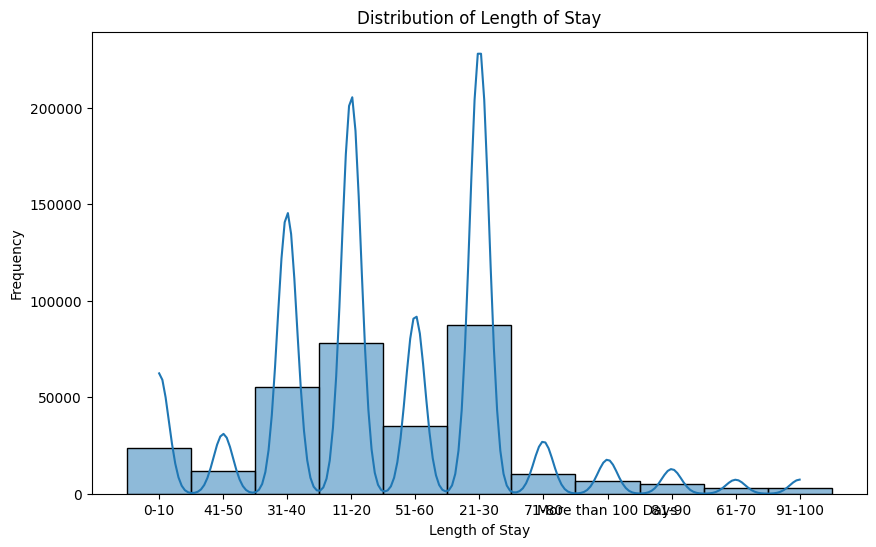

In [78]:
plt.figure(figsize=(10, 6))  # Set the size of the figure for better visualization
sns.histplot(train_data['Stay'], kde=True)  # Plot the distribution of Length of Stay with a KDE overlay
plt.title('Distribution of Length of Stay')  # Set the title of the plot
plt.xlabel('Length of Stay')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Show the plot

In [92]:
# Correlation Matrix
# Check the correlation between features.

In [93]:
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns # Correlation Matrix: Calculate the correlation matrix for numeric columns in the train_data DataFrame


In [94]:
correlation_matrix = train_data[numeric_columns].corr() # Exclude non-numeric columns and calculate correlation matrix


In [95]:
# Plot the correlation matrix heatmap

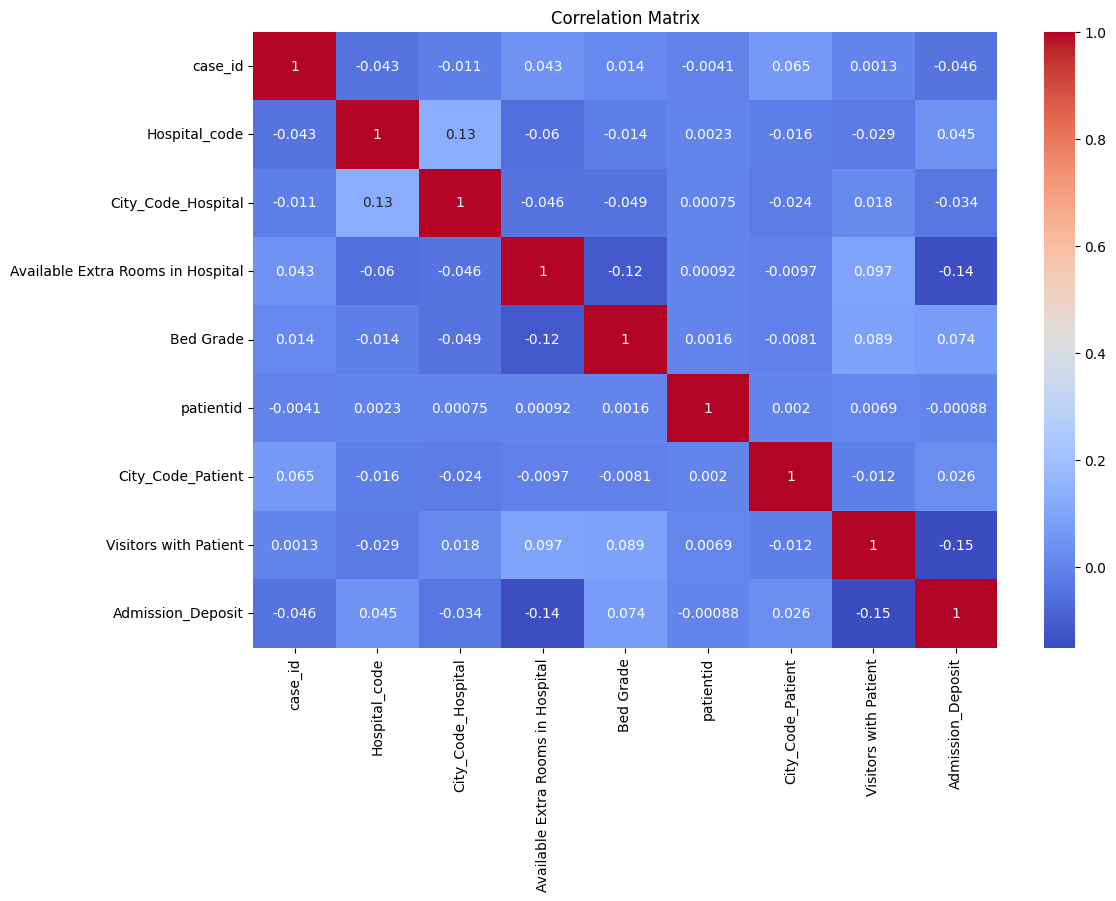

In [96]:
plt.figure(figsize=(12, 8)) # Plot the correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # Set the title of the plot
plt.title('Correlation Matrix') # Display the plot
plt.show() # Display the plot

# DATA PREPROCESSING

In [38]:
# Fill missing values with appropriate values

In [39]:
train_data['Bed Grade'].fillna(train_data['Bed Grade'].mode()[0], inplace=True)  # Filling missing values in 'Bed Grade' column with the mode


In [40]:
train_data['City_Code_Patient'].fillna(-1, inplace=True)  # Filling missing values in 'City_Code_Patient' column with -1


In [41]:
# Encode categorical variables to dummy variables

In [42]:
train_data = pd.get_dummies(train_data, drop_first=True)  # Converting categorical variables to dummy variables

In [81]:
#  Feature Scaling

In [82]:
# Initialize the scaler

In [83]:
scaler = StandardScaler() # This line creates an instance of the StandardScaler class, which will be used to scale the numeric features.


In [84]:
# Select only the numeric columns for scaling

In [85]:
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns # This line identifies the numeric columns in the train_data DataFrame, which will be used for scaling.


In [86]:
# Extract the numeric columns from the train_data DataFrame

In [87]:
data_numeric = train_data[numeric_columns] # This line creates a new DataFrame called data_numeric, containing only the numeric columns from train_data.


In [88]:
# Scale the features

In [89]:
data_scaled = scaler.fit_transform(data_numeric) # This line scales the numeric features in data_numeric using the scaler object previously initialized.
# It transforms the data to have a mean of 0 and a standard deviation of 1.


# SPLIT THE DATA

In [43]:
# Target column

In [44]:
target_column = 'Stay_11-20'  # Target column name, change to the desired stay duration column

In [45]:
# Split the data into features and target variable

In [46]:
X = train_data.drop(target_column, axis=1)  # Features (independent variables)

In [47]:
y = train_data[target_column]  # Target variable (dependent variable)

In [48]:
# Split the data into training and testing sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splitting data into train and test sets


# TRAIN THE MODEL

In [50]:
# Train the Linear Regression model

In [51]:
model = LinearRegression()  # Initializing the Linear Regression model

In [52]:
model.fit(X_train, y_train)  # Fitting the model to the training data

LinearRegression()

# EVALUTE THE MODEL

In [53]:
# Evaluate the model

In [54]:
y_pred = model.predict(X_test)  # Predicting the target variable for the test data

In [55]:
mse = mean_squared_error(y_test, y_pred)  # Calculating Mean Squared Error

In [56]:
r2 = r2_score(y_test, y_pred)  # Calculating R-squared score

In [57]:
print(f'Mean Squared Error: {mse}')  # Printing Mean Squared Error

Mean Squared Error: 0.055389074924193205


In [58]:
print(f'R-squared: {r2}')  # Printing R-squared score

R-squared: 0.7000056743069423


# Visualizations

In [60]:
# Actual vs Predicted Stay

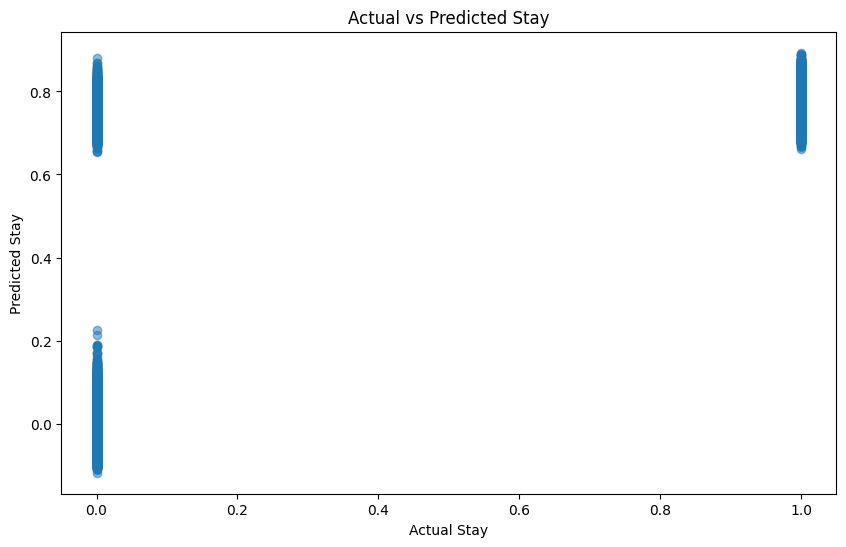

In [61]:
plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
plt.scatter(y_test, y_pred, alpha=0.5)  # Creating a scatter plot of actual vs predicted stay
plt.title('Actual vs Predicted Stay')  # Adding title to the plot
plt.xlabel('Actual Stay')  # Adding label to the x-axis
plt.ylabel('Predicted Stay')  # Adding label to the y-axis
plt.show()  # Displaying the plot

In [62]:
# Residual Plot

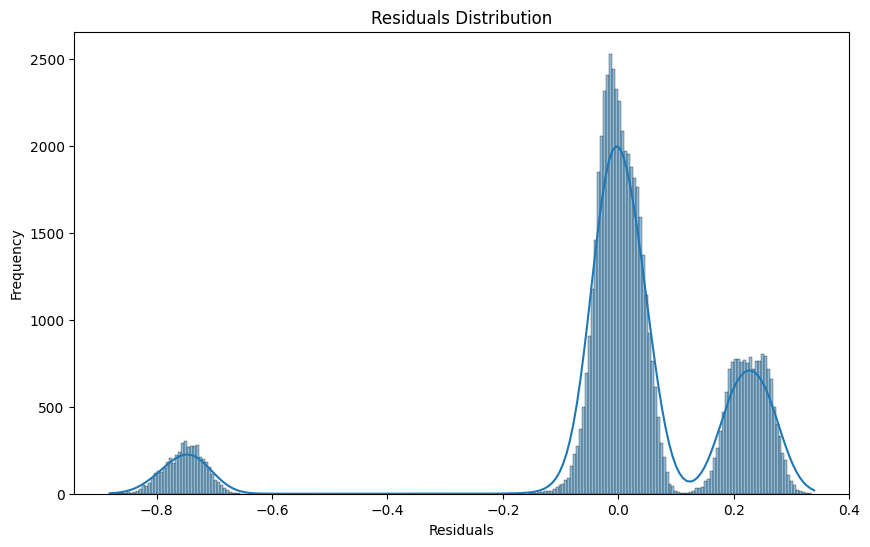

In [63]:
residuals = y_test - y_pred  # Calculating residuals
plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
sns.histplot(residuals, kde=True)  # Creating a histogram plot of residuals
plt.title('Residuals Distribution')  # Adding title to the plot
plt.xlabel('Residuals')  # Adding label to the x-axis
plt.ylabel('Frequency')  # Adding label to the y-axis
plt.show()  # Displaying the plot